# Automatic Number Plate Detection System

# Required Libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

# Data preprossing

In [ ]:
# open file
file = tarfile.open('ANPR_Assignment.tar.gz')

# extracting file
file.extractall('./data')

file.close()

In [ ]:
!ls

# Read The Image

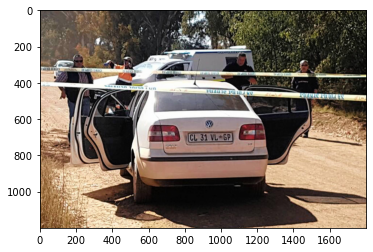

In [188]:
img = cv2.imread('./data/VOC2007/JPEGImages/car_87.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Gray Image')

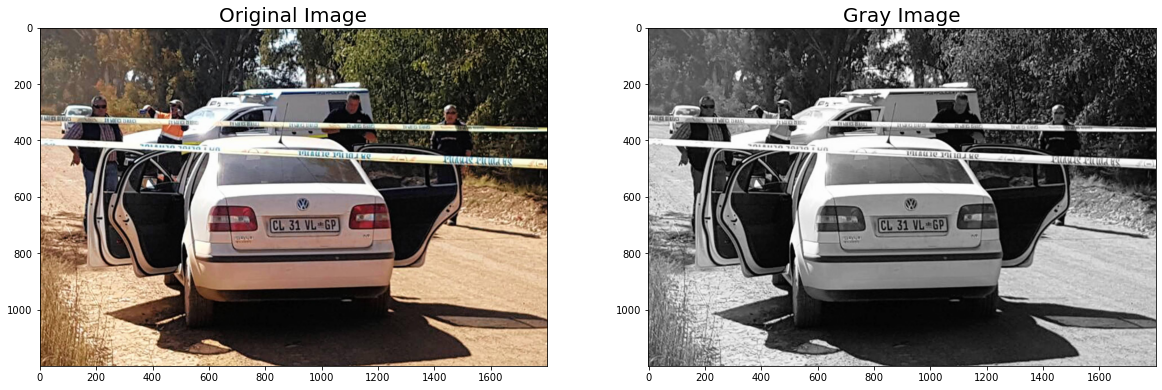

In [189]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
ax2.set_title('Gray Image', fontsize=20)

# Canny EDGE Detection

Text(0.5, 1.0, 'Canny Image')

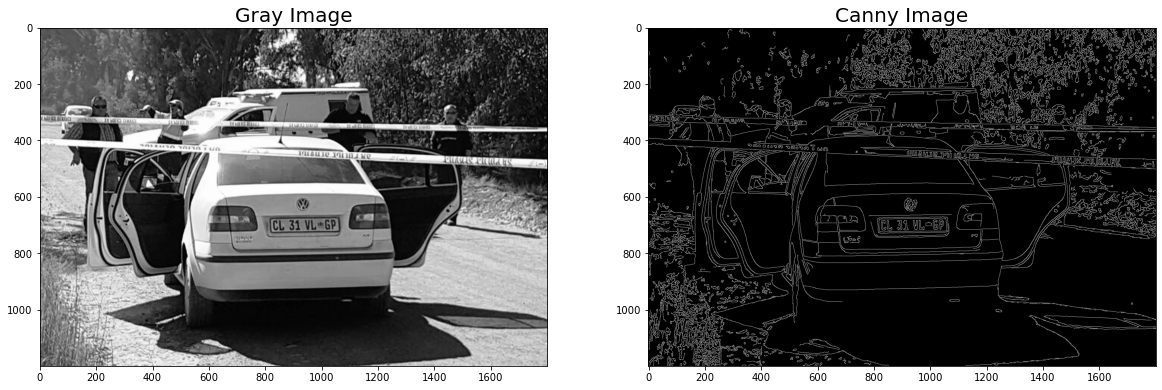

In [201]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 50, 200) #Edge detection

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
ax1.set_title('Gray Image', fontsize=20)
ax2.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
ax2.set_title('Canny Image', fontsize=20)

# Contours and Apply Mask

In [202]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [203]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [204]:
location

In [205]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


Text(0.5, 1.0, 'Mask Image')

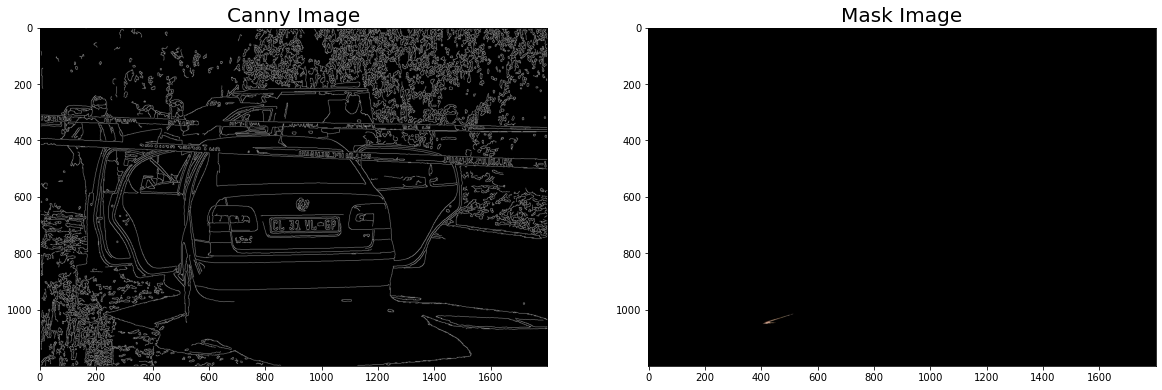

In [206]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
ax1.set_title('Canny Image', fontsize=20)
ax2.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
ax2.set_title('Mask Image', fontsize=20)

# Crop Number Plate

In [186]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

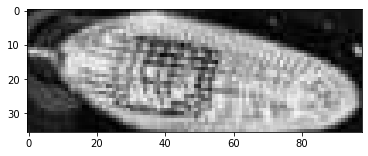

In [187]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Number Plate')

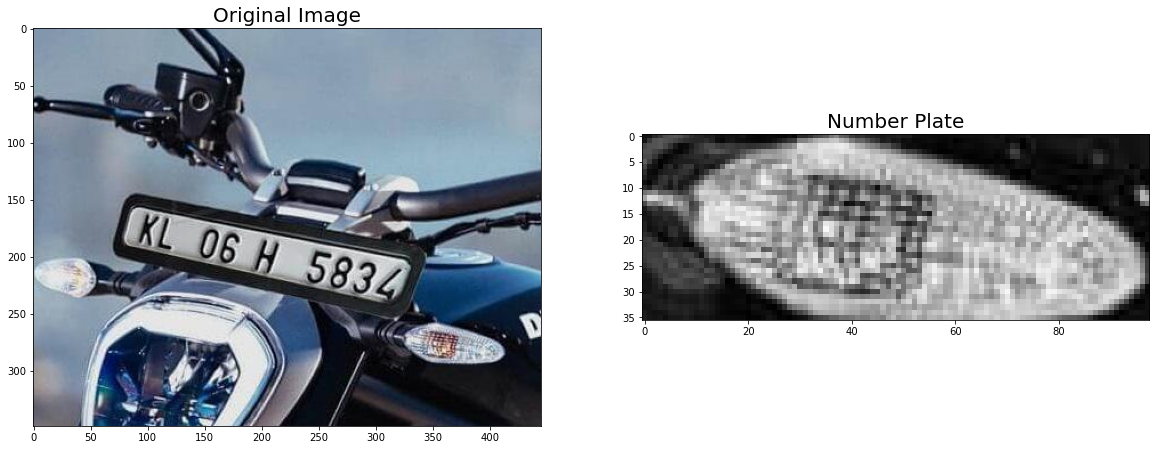

In [179]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
ax2.set_title('Number Plate', fontsize=20)

# Mark Number Plate

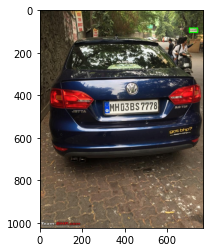

In [153]:
#text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
#res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [207]:
img = cv2.imread('./data/VOC2007/JPEGImages/car_81.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 130, 200) #Edge detection
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


In [ ]:
cv2.imshow("Final Image", cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

# Function

In [132]:
def input_img(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 200, 200) #Edge detection
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    cv2.imshow("Final Image", res)
    cv2.waitKey(0)

In [133]:
input_img("./data/VOC2007/JPEGImages/car_18.jpg")

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
